In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from xgboost import XGBClassifier

In [91]:
train_df = pd.read_csv('../dataset/titanic-machine-learning-from-disaster/train.csv')
test_df = pd.read_csv('../dataset/titanic-machine-learning-from-disaster/test.csv')

print(f'size of train_df: {train_df.shape}, size of test_df: {test_df.shape}')

size of train_df: (891, 12), size of test_df: (418, 11)


In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df = train_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [114]:
cat_features = ['Embarked', 'Sex']
num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

cat_preprocess = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

num_preprocess = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_preprocess, num_features),
        ('cat', cat_preprocess, cat_features)
    ]
)

X_train = preprocessor.fit_transform(train_df.drop('Survived', axis=1))
y_train = train_df['Survived']

In [115]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [118]:
grid_param = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), grid_param, cv=5)
grid_search_rf.fit(X_train, y_train)

y_pred = grid_search_rf.best_estimator_.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [119]:
gird_param = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), gird_param, cv=5)
grid_search_dt.fit(X_train, y_train)

y_pred = grid_search_dt.best_estimator_.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       549
           1       0.83      0.75      0.79       342

    accuracy                           0.85       891
   macro avg       0.84      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891



In [120]:
grid_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search_svc = GridSearchCV(SVC(), grid_param, cv=5)
grid_search_svc.fit(X_train, y_train)

y_pred = grid_search_svc.best_estimator_.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.83      0.72      0.77       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.82       891
weighted avg       0.84      0.84      0.84       891



In [121]:
grid_param = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1],
}

grid_search_xgb = GridSearchCV(XGBClassifier(), grid_param, cv=5)
grid_search_xgb.fit(X_train, y_train)

y_pred = grid_search_xgb.best_estimator_.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       549
           1       0.92      0.85      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.90       891
weighted avg       0.91      0.91      0.91       891



<function matplotlib.pyplot.show(close=None, block=None)>

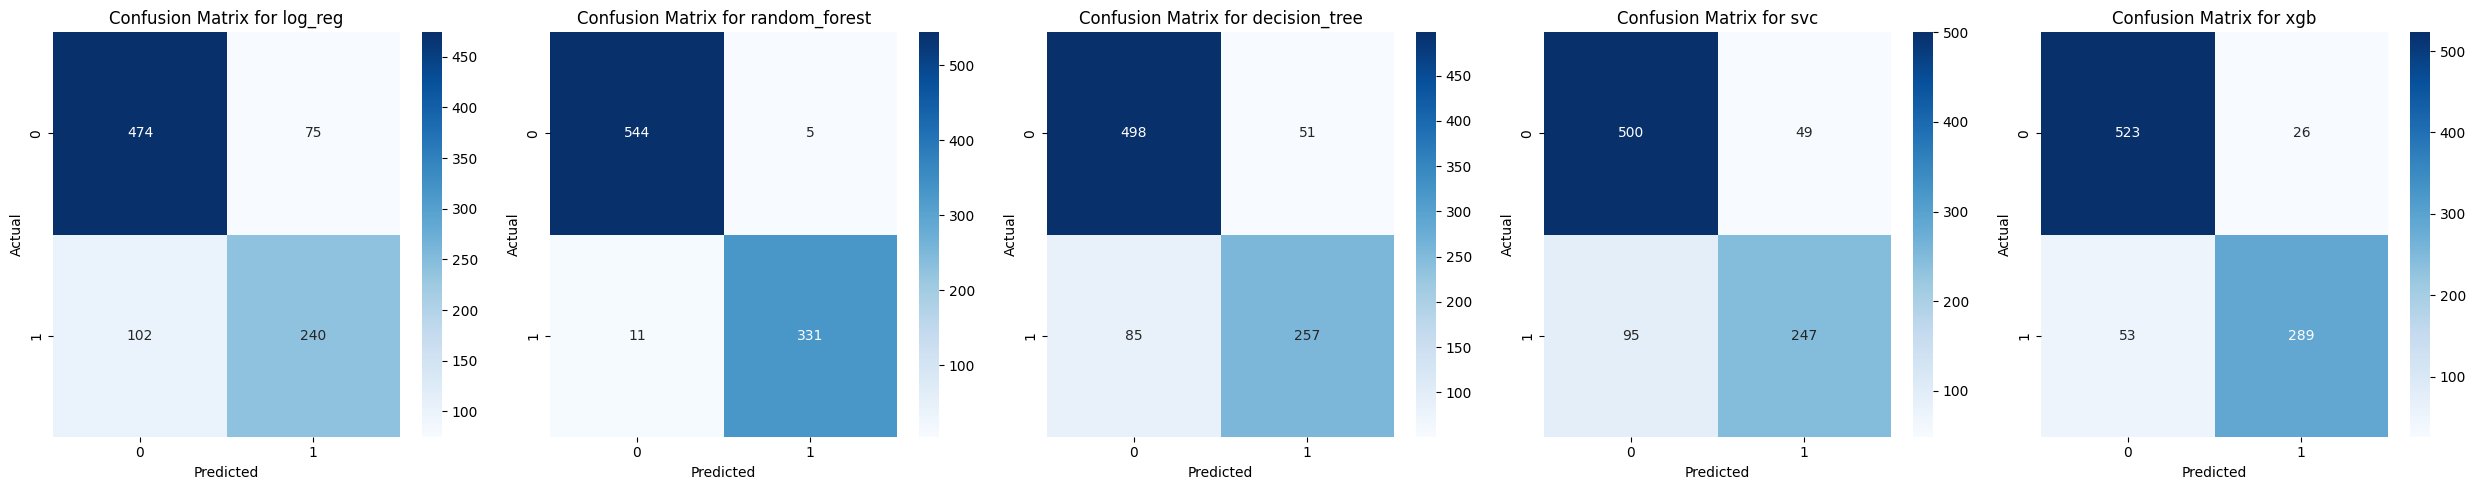

In [122]:
models = {
    'log_reg': log_reg,
    'random_forest': grid_search_rf.best_estimator_,
    'decision_tree': grid_search_dt.best_estimator_,
    'svc': grid_search_svc.best_estimator_,
    'xgb': grid_search_xgb.best_estimator_,
}

fix, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 5))
for ax, (name, model) in zip(axes, models.items()):

    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix for {name}")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show

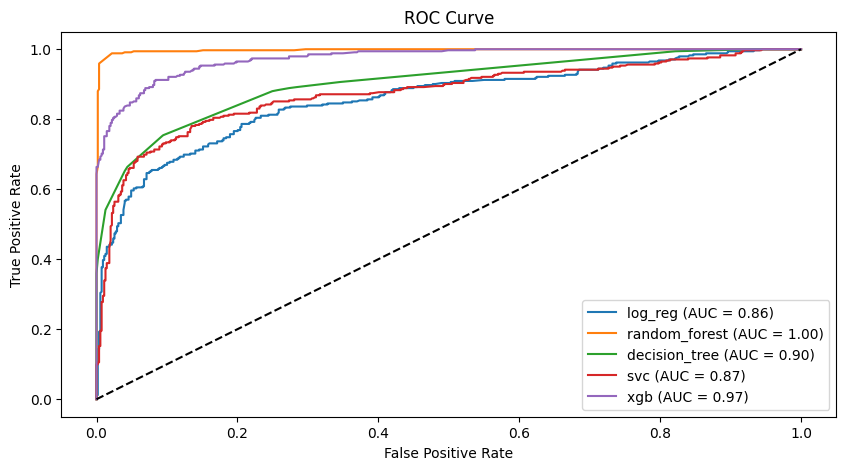

In [123]:
plt.figure(figsize=(10, 5))

for name, model in models.items():

    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_train)[:, 1]
    else:
        y_pred = model.decision_function(X_train)

    fpr, tpr, _ = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [125]:
X_test = preprocessor.transform(test_df.drop(['Cabin', 'Name', 'Ticket'], axis=1))
y_test = grid_search_rf.best_estimator_.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test
})

submission.to_csv('../dataset/titanic-machine-learning-from-disaster/submission.csv', index=False)